# MI
**_Ahmed - Luisa - Myria_**

## Exercise H5.1 (Cross Validation)


### a) Pre-processing


In [83]:
import numpy as np
from numpy.linalg import eig

training_data = np.genfromtxt('TrainingRidge.csv', delimiter=',')[1:]          # 200 rows
validation_data = np.genfromtxt('ValidationRidge.csv', delimiter=',')[1:]      # 1476 rows


#### The following applies only to training data ####
# 1. Getting the mean (X1_mean, X2_mean)
training_mean = (training_data.T[0].mean(), training_data.T[1].mean())

# 2. Getting centered input data (using training mean for both)
centered_training_input = np.array([training_data.T[0] - training_mean[0], training_data.T[1] - training_mean[1]]).T
centered_validation_input = np.array([validation_data.T[0] - training_mean[0], validation_data.T[1] - training_mean[1]]).T

# 3. Calculating the covariance matrix (shape: 2x2)
    # c_11 = sum([centered_point[0]*centered_point[0] for centered_point in centered_input]) / len(centered_input)
    # c_12 = sum([centered_point[0]*centered_point[1] for centered_point in centered_input]) / len(centered_input)
    # c_21 = sum([centered_point[1]*centered_point[0] for centered_point in centered_input]) / len(centered_input)
    # c_22 = sum([centered_point[1]*centered_point[1] for centered_point in centered_input]) / len(centered_input)
    # C = np.array([[c_11, c_12], [c_21, c_22]])
C = np.cov(centered_training_input.T)

# 4. Calculate eigenvalues
eigenvalues, eigenvectors = eig(C)

# 5. Evaluating the sphering transformation matrix (shape: 2x2)
sphering_trans = np.dot(np.diag(np.power(eigenvalues, -1/2)), eigenvectors.T)

# 6. Evaluating the sphered (Training) data
sphered_training_input = np.array([np.dot(sphering_trans, centered_point) for centered_point in centered_training_input])
sphered_training_data = np.append(sphered_training_input.T, [training_data.T[2]], axis=0).T

# 7. Evaluating the sphered (Validation) data
sphered_validation_input = np.array([np.dot(sphering_trans, centered_point) for centered_point in centered_validation_input])
sphered_validation_data = np.append(sphered_validation_input.T, [validation_data.T[2]], axis=0).T
# sphered_validation_data

sphering_trans

array([[-0.04986584,  0.00748446],
       [-0.00634296, -0.0422605 ]])

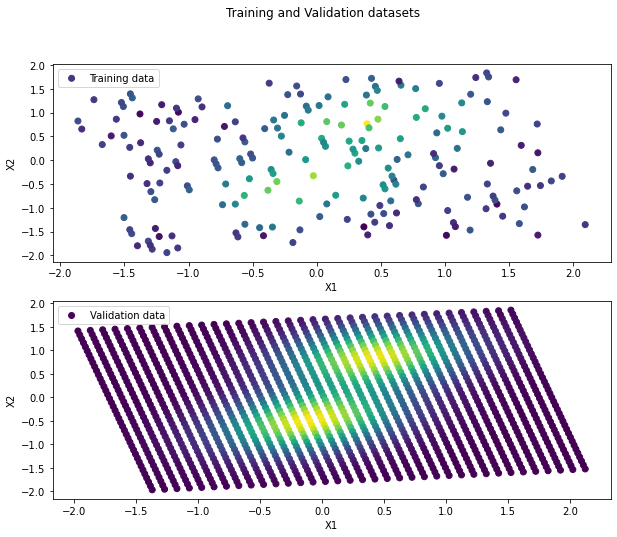

In [86]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Plotting the data
def plot(sphered_training_data, sphered_validation_data):
        """
        Takes weights array and plot it
        """
        fig, axs = plt.subplots(2, figsize=(10, 8))
        fig.suptitle('Training and Validation datasets')

        # Plot training
        x1_training = sphered_training_data.T[0]
        x2_training = sphered_training_data.T[1]
        axs[0].scatter(x1_training, x2_training, c = sphered_training_data.T[2], label = "Training data")

        # Plot validation
        x1_validation = sphered_validation_data.T[0]
        x2_validation = sphered_validation_data.T[1]
        axs[1].scatter(x1_validation, x2_validation, c = sphered_validation_data.T[2], label = "Validation data")
        
        # Cosmetic stuff
        axs[0].set_xlabel("X1")
        axs[0].set_ylabel("X2")
        axs[1].set_xlabel("X1")
        axs[1].set_ylabel("X2")
        axs[0].legend()
        axs[1].legend()
        plt.show()
        
plot(sphered_training_data, sphered_validation_data)

### b) Feature Extraction